In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
df= pd.DataFrame(data=iris.data, columns= iris.feature_names)

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df.shape

(150, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [8]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: >

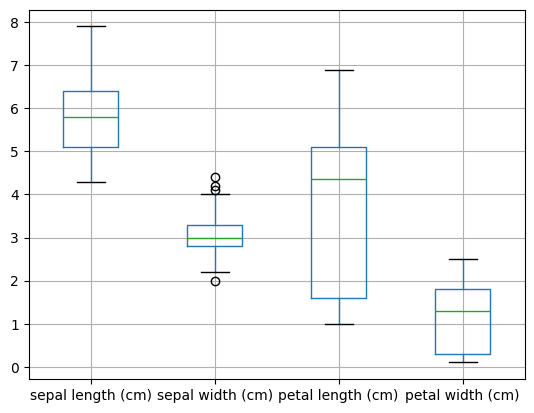

In [9]:
df.boxplot()

In [10]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [11]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train.shape

(120, 4)

In [13]:
X_test.shape

(30, 4)

In [14]:
y_train.shape

(120,)

In [15]:
y_test.shape

(30,)

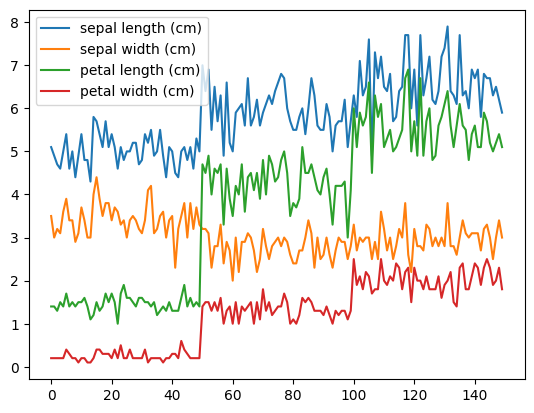

In [16]:
df.iloc[:,0:].plot()
plt.show()

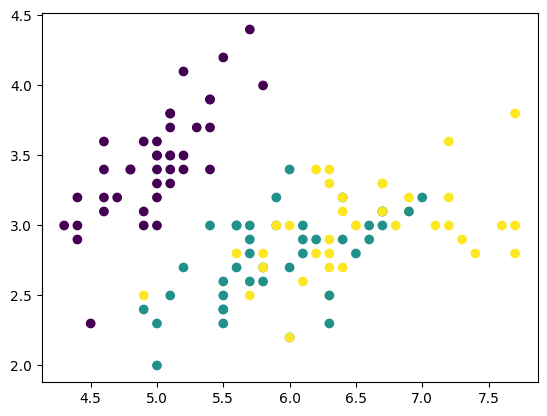

In [17]:
plt.scatter(x=X_train[:,0], y=X_train[:,1], c=y_train)
plt.show()

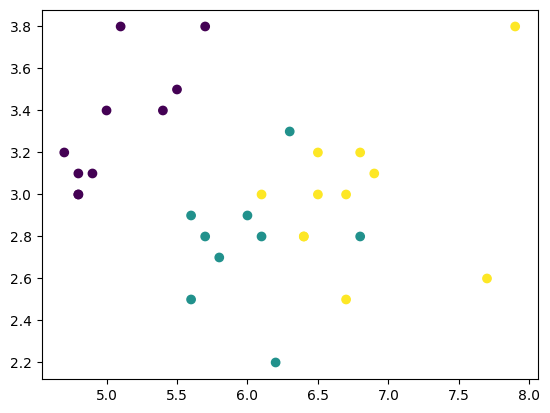

In [18]:
plt.scatter(x=X_test[:,0], y=X_test[:,1], c=y_test)
plt.show()

In [19]:
# Define the hyperparameters to try
kernels = ['rbf']
gammas = [0.5]
Cs = [0.01, 1, 10]
best_accuracy = 0
best_parameters = None
best_support_vectors = None

In [20]:
# Iterate over different combinations of hyperparameters
for kernel in kernels:
    for gamma in gammas:
        for C in Cs:
            # Train the SVM classifier
            svm_clf = SVC(kernel=kernel, gamma=gamma, C=C, decision_function_shape='ovr')
            svm_clf.fit(X_train, y_train)

In [21]:
# Predict on the test set
y_pred = svm_clf.predict(X_test)

In [22]:
# Calculate classification accuracy
accuracy = accuracy_score(y_test, y_pred)

In [23]:
# Get the total number of support vectors
total_support_vectors = np.sum(svm_clf.n_support_)

In [24]:
print(f" Kernel: {kernel}, Gamma: {gamma}, C: {C}, Accuracy: {accuracy}, Total Support Vectors: {total_support_vectors}")

 Kernel: rbf, Gamma: 0.5, C: 10, Accuracy: 1.0, Total Support Vectors: 31


In [25]:
# Check if this model has the best accuracy so far
if accuracy > best_accuracy:
    best_accuracy = accuracy
    best_parameters = (kernel, gamma, C)
    best_support_vectors = total_support_vectors

In [26]:
print("\nBest Classification Accuracy:", best_accuracy)
print("Best Hyperparameters:", best_parameters)
print("Total Support Vectors for Best Model:", best_support_vectors)


Best Classification Accuracy: 1.0
Best Hyperparameters: ('rbf', 0.5, 10)
Total Support Vectors for Best Model: 31
